<a href="https://colab.research.google.com/github/Saurabh07703/EDA_Repo/blob/main/CartPole_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, mutual_info_classif
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.pipeline import Pipeline
import gym

# Load Dataset


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [ ]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
    "relation", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [ ]:
data = pd.read_csv(url, header=None, names=columns, na_values="?", skipinitialspace=True)

# Preview Data


In [ ]:
data.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 1: Data Preparation


# Handle missing values


In [ ]:
data.dropna(inplace=True)

# Encode categorical features


In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation', 'relation',
       'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
label_encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relation': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native-country': LabelEncoder(),
 'income': LabelEncoder()}

In [ ]:
for col in categorical_cols:
  data[col] = label_encoders[col].fit_transform(data[col])

# Split features and target


In [ ]:
X = data.drop(columns=["income"])
Y = data["income"]

In [ ]:
[[X,Y]]

[[       age  workclass  fnlwgt  education  education-num  marital-status  \
  0       39          5   77516          9             13               4   
  1       50          4   83311          9             13               2   
  2       38          2  215646         11              9               0   
  3       53          2  234721          1              7               2   
  4       28          2  338409          9             13               2   
  ...    ...        ...     ...        ...            ...             ...   
  32556   27          2  257302          7             12               2   
  32557   40          2  154374         11              9               2   
  32558   58          2  151910         11              9               6   
  32559   22          2  201490         11              9               4   
  32560   52          3  287927         11              9               2   
  
         occupation  relation  race  sex  capital-gain  capital-loss  \
 

# Train-test split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
[[X_train, X_test, Y_train, Y_test]]

[[       age  workclass  fnlwgt  education  education-num  marital-status  \
  29253   35          2  186009         11              9               2   
  14267   23          2  192978         11              9               2   
  26021   39          2  188503          9             13               2   
  24278   33          2  168030         11              9               0   
  4225    27          3  233724         11              9               5   
  ...    ...        ...     ...        ...            ...             ...   
  32171   40          2   67852         11              9               0   
  5875    41          4  120539         15             10               2   
  935     37          2  176900         11              9               2   
  17056   56          4   51662          1              7               2   
  25528   54          3  196328          9             13               2   
  
         occupation  relation  race  sex  capital-gain  capital-loss  \
 

# Feature scaling


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
[[X_train, X_test]]

[[array([[-0.25109827, -0.21124739, -0.03480984, ..., -0.21846958,
          -0.08139309,  0.26880512],
         [-1.16398504, -0.21124739,  0.03140109, ..., -0.21846958,
          -0.08139309,  0.26880512],
         [ 0.05319732, -0.21124739, -0.0111149 , ..., -0.21846958,
           1.58385464,  0.26880512],
         ...,
         [-0.09895048, -0.21124739, -0.12135245, ..., -0.21846958,
           4.83108771,  0.26880512],
         [ 1.34645358,  1.88366391, -1.31121114, ..., -0.21846958,
          -0.08139309,  0.26880512],
         [ 1.19430579,  0.83620826,  0.06322871, ..., -0.21846958,
          -0.08139309, -2.30984313]]),
  array([[-0.78361556, -0.21124739, -1.0731976 , ..., -0.21846958,
           1.1675427 ,  0.26880512],
         [ 0.20534512, -0.21124739, -0.10680675, ..., -0.21846958,
          -0.08139309, -0.21469143],
         [ 1.11823189, -0.21124739,  0.95926627, ..., -0.21846958,
           0.75123077, -4.24382932],
         ...,
         [-0.25109827, -0.21124739

# Step 2: Supervised Learning


# Classification: Multi-Model Comparison


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC()
}

In [ ]:
for name, model in models.items():
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  acc = accuracy_score(Y_test, Y_pred)
  print(f"{name}: accuracy = {acc:.4f}")

Logistic Regression: accuracy = 0.8185
Random Forest: accuracy = 0.8557
Gradient Boosting: accuracy = 0.8619
AdaBoost: accuracy = 0.8477
SVM: accuracy = 0.8482


# Handle Imbalanced Dataset with SMOTE


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, Y_resampled)

RandomForestClassifier(random_state=42)

# Evaluate SMOTE model


In [ ]:
y_pred_smote = rf_model.predict(X_test)
print("Accuracy after SMOTE:", accuracy_score(Y_test, y_pred_smote))

Accuracy after SMOTE: 0.8444026964305448


# Regression: Predict Hours Worked Per Week


In [ ]:
regressor = DecisionTreeClassifier(random_state=42)
regressor.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

# Predictions


In [ ]:
Y_pred_reg = regressor.predict(X_test)
Y_pred_reg

array([0, 1, 0, ..., 1, 0, 0])

# Evaluate the regression model


In [ ]:
mse = mean_squared_error(Y_test, Y_pred_reg)
print(f"Mean_Squared_Error : {mse}")

Mean_Squared_Error : 0.1923969499392198


# Step 3: Unsupervised Learning


# K-Means Clustering


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
clusters

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

# Add cluster labels to data


In [ ]:
data["cluster"] = clusters

# Visualize clusters using PCA


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

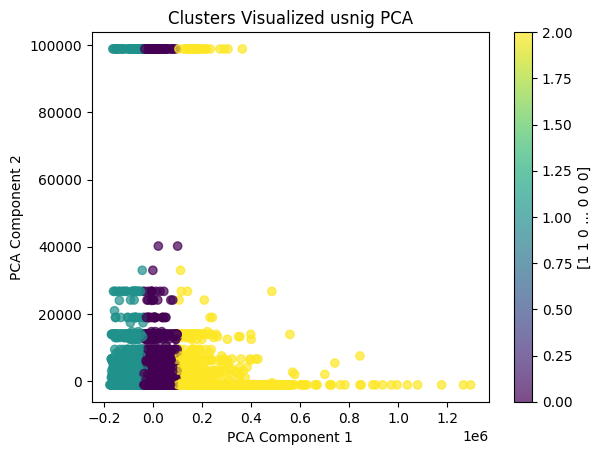

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("Clusters Visualized usnig PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label=clusters)
plt.show()

# Clustering Evaluation


In [ ]:
silhouette_avg = silhouette_score(X, clusters)
print(f"SilhuetteScore: {silhouette_avg}")

SilhuetteScore: 0.5522082378081599


# Step 4: Feature Engineering


# Polynomial Features


In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_poly = poly.fit_transform(X_train)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Feature Selection using RFE


In [ ]:
selector = RFE(rf_model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, Y_train)
selected_features = X.columns[selector.support_]
print("Selected_Features:", selected_features)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Selected_Features: Index(['age', 'fnlwgt', 'education-num', 'relation', 'capital-gain'], dtype='object')


# Mutual Information


In [ ]:
mi = mutual_info_classif(X_train, Y_train)
mi_scores = pd.DataFrame({"Feature": X.columns, "Score": mi}).sort_values(by="Score", ascending = False)
print(mi_scores)

           Feature     Score
7         relation  0.113395
5   marital-status  0.102503
10    capital-gain  0.084513
0              age  0.066634
6       occupation  0.065999
3        education  0.064189
4    education-num  0.061965
11    capital-loss  0.038833
12  hours-per-week  0.038659
9              sex  0.030601
2           fnlwgt  0.022206
1        workclass  0.009804
13  native-country  0.007569
8             race  0.007213


# Step 5: Reinforcement Learning


# Define an RL environment using OpenAI Gym


In [ ]:
env = gym.make("CartPole-v1")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Example: Random Policy for CartPole


In [ ]:
episodes = 5
for episode in range(episodes):
  state = env.reset()
  done = False
  total_reward = 0
  while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    env.render()
  print(f"Episode {episode+1}: total_reward : {total_reward}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render metho

Episode 1: total_reward : 18.0
Episode 2: total_reward : 16.0
Episode 3: total_reward : 27.0
Episode 4: total_reward : 14.0
Episode 5: total_reward : 13.0


In [ ]:
env.close()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Step 6: Deep Learning


# Build Neural Network


In [ ]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7983 - loss: 0.4420 - val_accuracy: 0.8297 - val_loss: 0.3542
Epoch 2/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8358 - loss: 0.3518 - val_accuracy: 0.8307 - val_loss: 0.3447
Epoch 3/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8444 - loss: 0.3395 - val_accuracy: 0.8340 - val_loss: 0.3397
Epoch 4/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8389 - loss: 0.3377 - val_accuracy: 0.8352 - val_loss: 0.3380
Epoch 5/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3292 - val_accuracy: 0.8331 - val_loss: 0.3373
Epoch 6/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3327 - val_accuracy: 0.8354 - val_loss: 0.3395
Epoch 7/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.3225 - val_accuracy: 0.8361 - val_loss: 0.3363
Epoch 8/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.3297 - val_accuracy: 0.

# Evaluate Neural Network


In [ ]:
nn_accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {nn_accuracy}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neural Network Accuracy: 0.8440711498260498


# Step 7: Hyperparameter Tuning


# Grid Search for Random Forest


In [ ]:
  param_grid = {
      "n_estimators": [50, 100, 150],
      "max_depth": [None, 10, 20, 30],
      "min_samples_split": [2, 5, 10]
  }

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8589968551321895


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
